### IMPORTING PACKAGES

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

### IMPORTING DATA

In [2]:
raw_train_df = pd.read_csv('data/train_set.csv')
raw_test_df = pd.read_csv('data/test_set.csv')

### EXPLORATORY DATA ANALYSIS

In [3]:
train_df = raw_train_df.copy(deep = True)
test_df = raw_test_df.copy(deep = True)

In [4]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
train_df.shape

(33000, 2)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


Two columns lang_id and text

In [7]:
train_df.isna().sum()

lang_id    0
text       0
dtype: int64

No null values present

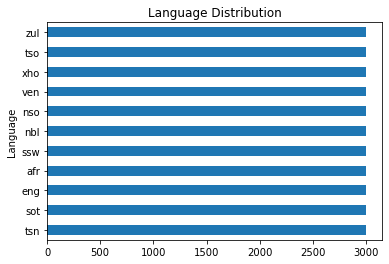

In [8]:
train_df['lang_id'].value_counts().plot(kind = 'barh', 
                                        title = 'Language Distribution', 
                                        xlabel = 'Language',
                                        ylabel = 'Frequency')
plt.show()

The data is balanced

In [9]:
len(train_df['text'].unique())

29948

The data contains duplicates

In [10]:
train_df[train_df.duplicated(['text'])].shape

(3052, 2)

3,052 texts are duplicates

In [11]:
train_df.groupby('text').filter(lambda x: len(x['lang_id'].unique()) > 1)

,lang_id,text


None of the duplicates contain conflicting data

### FEATURE ENGINEERING

#### Label_encoding 

In [12]:
le = LabelEncoder()
le.fit(train_df['lang_id'])
train_df['lang_id'] = le.transform(train_df['lang_id'])
train_df['lang_id'].value_counts()

0     3000
1     3000
2     3000
3     3000
4     3000
5     3000
6     3000
7     3000
8     3000
9     3000
10    3000
Name: lang_id, dtype: int64

There are 10 languages present in the data set. Label Encoder turns the language id from text to numerical figres that the model can identify

In [13]:
train_df['text'].head()

0    umgaqo-siseko wenza amalungiselelo kumaziko ax...
1    i-dha iya kuba nobulumko bokubeka umsebenzi na...
2    the province of kwazulu-natal department of tr...
3    o netefatša gore o ba file dilo ka moka tše le...
4    khomishini ya ndinganyiso ya mbeu yo ewa maana...
Name: text, dtype: object

There is some punctuations in the data set that we will clean before vectorizing

In [14]:
X = train_df['text']
y = train_df['lang_id']

We split the features and labels above and define a function that cleans the text data

In [15]:
def preprocess(text):
    #create an empty list
    text_list = []
    
    #iterate through every word in the row
    for t in text:
        #remove any punctuation and numbers
        t = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', t)
        
        #remove any square brackets present
        t = re.sub(r'[[]]', ' ', t)
        # converting the text to lower case
        t = t.lower()
        #appending to data_list
        text_list.append(t)
    #return the cleaned text as a string    
    text = ''.join(text_list)
    return text
#apply the function to the text data
pre_X = train_df['text'].apply(lambda x: preprocess(x))


<ipython-input-15-f9874cd243d8>:5: FutureWarning: Possible nested set at position 1
  t = re.sub(r'[[]]', ' ', t)


In [16]:
pre_X.shape

(33000,)

In [17]:
#Initalize the vectorizer
cv = CountVectorizer()
#fit it into the cleaned text to create a dictionary
cv.fit(pre_X)

#transform the cleaned text to return figures

X_cv = cv.transform(pre_X)

In [19]:
#split the data set into 80% train and 20% test
X_cv_train, X_cv_test, y_train, y_test = train_test_split(X_cv,y,
                                                   test_size = 0.2)

### Modelling and Model Evaluation

#### Multinomial Naive Bayes

In [21]:
#Initialize the model and fit it into the train set
cv_mnb = MultinomialNB(alpha = 1)
cv_mnb.fit(X_cv_train, y_train)

MultinomialNB(alpha=1)

In [23]:
#predict the test data
y_cv_pred = cv_mnb.predict(X_cv_test)

In [25]:
#evaluate the perfomance for the model

ac = accuracy_score(y_test, y_cv_pred)
cm = confusion_matrix(y_test, y_cv_pred)
f1 = f1_score(y_test, y_cv_pred, average = 'weighted')
cr = classification_report(y_test, y_cv_pred, digits=4)
print("Accuracy is :",ac)
print("F1 score is :",f1)


Accuracy is : 0.9989393939393939
F1 score is : 0.998939378720678


It is a very well perfoming model with accuracy and f1 of almost 1

In [26]:
cv_mnb.get_params()

{'alpha': 1, 'class_prior': None, 'fit_prior': True}

In [27]:
print(cr)

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       575
           1     0.9983    1.0000    0.9992       597
           2     0.9952    0.9984    0.9968       628
           3     0.9982    0.9982    0.9982       566
           4     1.0000    1.0000    1.0000       644
           5     1.0000    1.0000    1.0000       585
           6     0.9983    0.9983    0.9983       581
           7     1.0000    1.0000    1.0000       619
           8     1.0000    1.0000    1.0000       598
           9     1.0000    0.9983    0.9992       596
          10     0.9984    0.9951    0.9967       611

    accuracy                         0.9989      6600
   macro avg     0.9989    0.9989    0.9989      6600
weighted avg     0.9989    0.9989    0.9989      6600



#### Linear SVC

Perform the same for the Linear SVC

In [28]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [29]:
svc_cv = LinearSVC()
svc_cv.fit(X_cv_train, y_train)
y_cv_pred = svc_cv.predict(X_cv_test)

C:\Users\USER\SeraApps\anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
ac = accuracy_score(y_test, y_cv_pred)
cm = confusion_matrix(y_test, y_cv_pred)
f1 = f1_score(y_test, y_cv_pred, average = 'weighted')
cr = classification_report(y_test, y_cv_pred)
print("Accuracy is :",ac)
print("F1 score is :",f1)

Accuracy is : 0.9962121212121212
F1 score is : 0.9962099913402458


The performance is good however it is below the Multinomial Naive Bayes by approximately 0.002

In [32]:
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       575
           1       1.00      1.00      1.00       597
           2       0.99      0.99      0.99       628
           3       1.00      0.99      1.00       566
           4       1.00      1.00      1.00       644
           5       0.99      1.00      1.00       585
           6       0.99      1.00      1.00       581
           7       1.00      1.00      1.00       619
           8       1.00      1.00      1.00       598
           9       1.00      0.99      0.99       596
          10       0.99      0.98      0.98       611

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



#### Optimizing the model

We optimize the Multinomial Naive Bayes using GridSearchCV. This was the model for the final submission

In [48]:
X_otrain, X_otest, y_otrain, y_otest = train_test_split(pre_X,y,
                                                   test_size = 0.3, random_state = 42)

In [58]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'clf__alpha': [1, 1e-1, 1e-2]
}

In [59]:
score = 'f1_macro'
print("# Tuning hyper-parameters for %s" % score)
np.errstate(divide='ignore')

clf = GridSearchCV(text_clf, tuned_parameters, cv=10, scoring=score)
clf.fit(X_otrain, y_otrain)

print("Best parameters set found on development set:")
print(clf.best_params_)

print("Detailed classification report:")
print(classification_report(y_otest, clf.predict(X_otest), digits=4))

# Tuning hyper-parameters for f1_macro
Best parameters set found on development set:
{'clf__alpha': 0.1, 'vect__ngram_range': (1, 2)}
Detailed classification report:
              precision    recall  f1-score   support

           0     0.9989    1.0000    0.9994       895
           1     0.9989    1.0000    0.9995       909
           2     0.9977    0.9977    0.9977       879
           3     0.9989    0.9979    0.9984       941
           4     0.9978    1.0000    0.9989       918
           5     1.0000    1.0000    1.0000       908
           6     1.0000    0.9977    0.9989       882
           7     1.0000    1.0000    1.0000       857
           8     1.0000    1.0000    1.0000       936
           9     0.9989    0.9989    0.9989       922
          10     0.9988    0.9977    0.9982       853

    accuracy                         0.9991      9900
   macro avg     0.9991    0.9991    0.9991      9900
weighted avg     0.9991    0.9991    0.9991      9900



In [60]:
print(f1_score(y_otest, clf.predict(X_otest), average = 'weighted'))

0.9990907908991812


The accuracy is better by a small margin. However, the classification report shows better perfomance for all the languages. 

#### Kaggle Submission

In [37]:
test_df['text'] = test_df['text'].apply(lambda x: preprocess(x))
test_text = test_df['text']

In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [39]:
test_text.shape

(5682,)

In [40]:
test_X = cv.transform(test_text)

##### MultiNominal Naive Bayes

In [41]:
test_pred = cv_mnb.predict(test_X)

In [42]:
test_lang_id = le.inverse_transform(test_pred)

In [43]:
sub_id = test_df['index'].to_list()
sub_pred = test_lang_id.tolist()
list_of_tuples = list(zip(sub_id, sub_pred))
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['index', 'lang_id'])
submission_df.set_index('index', inplace=True)

In [44]:
submission_df.head()

,lang_id
index,
1,tsn
2,nbl
3,ven
4,ssw
5,afr


In [45]:
submission_df.to_csv('310322 - Multinomial Naive Bayes model with Count Vectorizer- mod.csv')

##### SVC submission

In [46]:
test_pred = svc.predict(test_X)
test_lang_id = le.inverse_transform(test_pred)
sub_id = test_df['index'].to_list()
sub_pred = test_lang_id.tolist()
list_of_tuples = list(zip(sub_id, sub_pred))
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['index', 'lang_id'])
submission_df.set_index('index', inplace=True)

In [47]:
submission_df.to_csv('310322 - Linear SVC model with Tfidf Vectorizer.csv')

##### Tuned MultiNomial

This is the final submission

In [62]:
test_pred = clf.predict(test_text)
test_lang_id = le.inverse_transform(test_pred)
sub_id = test_df['index'].to_list()
sub_pred = test_lang_id.tolist()
list_of_tuples = list(zip(sub_id, sub_pred))
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['index', 'lang_id'])
submission_df.set_index('index', inplace=True)

In [63]:
submission_df.to_csv('310322 - Optimised MultiNomial Model with Count Vectorizer.csv')